In [3]:
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

                                              0.0/15.5 MB ? eta -:--:--
                                              0.1/15.5 MB 1.3 MB/s eta 0:00:12
                                              0.2/15.5 MB 1.8 MB/s eta 0:00:09
                                              0.3/15.5 MB 2.1 MB/s eta 0:00:08
     -                                        0.4/15.5 MB 2.1 MB/s eta 0:00:08
     -                                        0.5/15.5 MB 2.3 MB/s eta 0:00:07
     -                                        0.6/15.5 MB 2.3 MB/s eta 0:00:07
     -                                        0.8/15.5 MB 2.3 MB/s eta 0:00:07
     --                                       0.9/15.5 MB 2.4 MB/s eta 0:00:07
     --                                       1.0/15.5 MB 2.3 MB/s eta 0:00:07
     --                                       1.1/15.5 MB 2.3 MB/s eta 0:00:07
     ---                                      1.2/15.5 MB 2.3 MB/s eta 0:00:07
     ---                                      1.3/15.5 MB 2

##### Importing the dataset takehome_user_engagement.csv

In [5]:
df1 = pd.read_csv('C:/Users/Priyanka C/Desktop/Guvi Projects/Task 5/takehome_user_engagement.csv')
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [6]:
df1.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [7]:
df1.info

<bound method DataFrame.info of                  time_stamp  user_id  visited
0       2014-04-22 03:53:30        1        1
1       2013-11-15 03:45:04        2        1
2       2013-11-29 03:45:04        2        1
3       2013-12-09 03:45:04        2        1
4       2013-12-25 03:45:04        2        1
...                     ...      ...      ...
207912  2013-09-06 06:14:15    11996        1
207913  2013-01-15 18:28:37    11997        1
207914  2014-04-27 12:45:16    11998        1
207915  2012-06-02 11:55:59    11999        1
207916  2014-01-26 08:57:12    12000        1

[207917 rows x 3 columns]>

In [8]:
df1.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

#### Finding the null values

In [9]:
df1.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [10]:
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [11]:
## Finding the ids with visited less than 3
df1[df1['visited']<3]

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [12]:
## multiple same ids are present 
df1[df1['visited']>2] 

,time_stamp,user_id,visited


In [13]:
df1.time_stamp=pd.to_datetime(df1.time_stamp) 
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [14]:
## grouping the userid based on visited 
df12=df1.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()
df12=pd.DataFrame(df12)
df12.head(20)

visited
user_id time_stamp         
1       2014-04-22        1
2       2013-11-15        1
        2013-11-16        0
        2013-11-17        0
        2013-11-18        0
        2013-11-19        0
        2013-11-20        0
        2013-11-21        0
        2013-11-22        0
        2013-11-23        0
        2013-11-24        0
        2013-11-25        0
        2013-11-26        0
        2013-11-27        0
        2013-11-28        0
        2013-11-29        1
        2013-11-30        0
        2013-12-01        0
        2013-12-02        0
        2013-12-03        0

In [15]:

df12 = df12.rolling(window=7, min_periods=1).sum()
df12.reset_index(inplace=True)
df12

,user_id,time_stamp,visited
0,1,2014-04-22,1.0
1,2,2013-11-15,2.0
2,2,2013-11-16,2.0
3,2,2013-11-17,2.0
4,2,2013-11-18,2.0
...,...,...,...
522496,11996,2013-09-06,4.0
522497,11997,2013-01-15,5.0
522498,11998,2014-04-27,6.0
522499,11999,2012-06-02,7.0


**The data is now ordered**

In [16]:
df123 = df12.groupby('user_id')[['visited']].max()
df123.head()

,visited
user_id,
1,1.0
2,3.0
3,2.0
4,3.0
5,4.0


In [17]:
df123.loc[df123['visited'] >= 3, 'adopted_user'] = 1
df123.loc[df123['visited'] < 3, 'adopted_user'] = 0 ## mapping if the visted number is greater than 3 then it is one or ther wise 0
df123['visited'] = df123['visited'].astype(int)
df123['adopted_user'] = df123['adopted_user'].astype(int)
df123.reset_index(inplace=True) 
df123.head()

,user_id,visited,adopted_user
0,1,1,0
1,2,3,1
2,3,2,0
3,4,3,1
4,5,4,1


In [18]:
df123

,user_id,visited,adopted_user
0,1,1,0
1,2,3,1
2,3,2,0
3,4,3,1
4,5,4,1
...,...,...,...
8818,11996,4,1
8819,11997,5,1
8820,11998,6,1
8821,11999,7,1


## Importing the second dataset takehome_user.csv 

In [19]:
df2 = pd.read_csv('C:/Users/Priyanka C/Desktop/Guvi Projects/Task 5/takehome_users.csv', encoding='latin-1' )
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [20]:
df2.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [22]:
df2.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

#### Finding the null values in the data set 

In [23]:
df2.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [24]:
## There are some null values in the columns last_session_creation_time and invited_by_user_id
df2['last_session_creation_time']  = df2['last_session_creation_time'].replace(to_replace = np.nan,value =0)
df2['invited_by_user_id']  = df2['invited_by_user_id'].replace(to_replace = np.nan,value =0)

In [25]:
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [26]:
df2.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [27]:
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0


### Creating a new column active_days

In [28]:
# Doing some feature engineering
df2.creation_time = pd.to_datetime(df2.creation_time)
df2.last_session_creation_time = pd.to_datetime(df2.last_session_creation_time)
df2['active_days'] = df2['creation_time'] -  df2['last_session_creation_time']
df2['active_days'] = df2['active_days'].dt.days
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,16182
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,16024
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,15783
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,15846
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,15722


Separating the email for analysis

In [29]:
df2['email_domain']=df2['email'].apply(lambda x:x.split('@')[1])
df2['email_domain'].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
                  ... 
lrabg.com            1
mrytw.com            1
ugtav.com            1
hqhll.com            1
iuxiw.com            1
Name: email_domain, Length: 1184, dtype: int64

**This shows that there are original and made up emails**

### Pie Chart showing the distribution of Domain Name of Email Used By users across the dataset

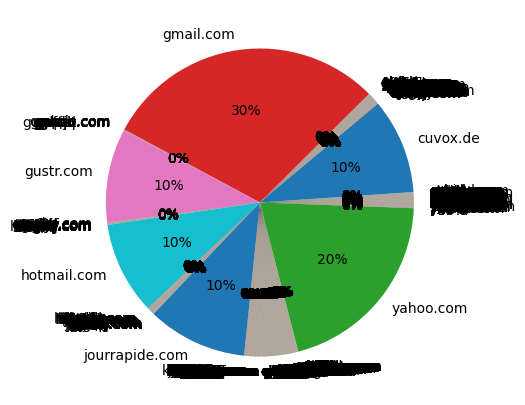

In [30]:
counting_domain_name = df2.groupby(['email_domain']).size()
counting_domain_name = counting_domain_name.to_frame(name = 'size').reset_index()
y = np.array(counting_domain_name['size'])
label = np.array(counting_domain_name['email_domain'])
plt.figure(figsize=(5,5))
plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()

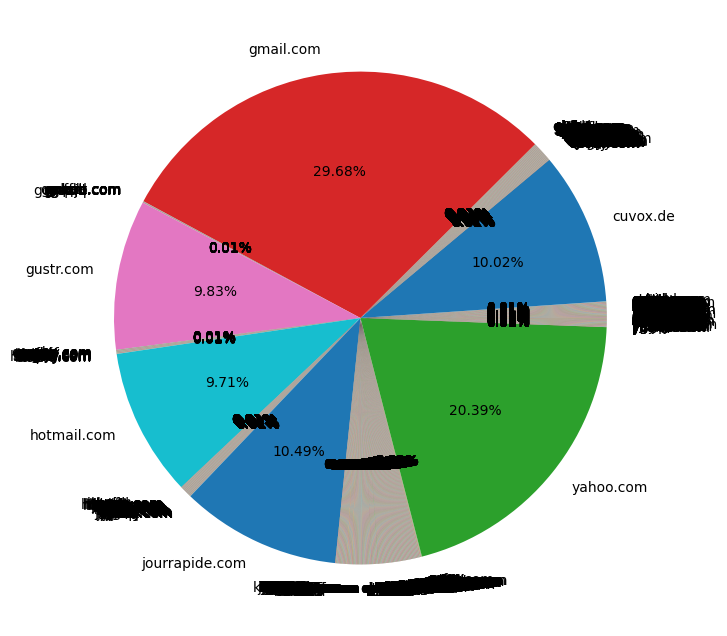

In [31]:
counting_domain_name = df2.groupby(['email_domain']).size()
counting_domain_name = counting_domain_name.to_frame(name = 'size').reset_index()
y = np.array(counting_domain_name['size'])
label = np.array(counting_domain_name['email_domain'])
plt.figure(figsize=(8,8))
plt.pie(y, labels =label, autopct='%0.2f%%')
plt.show()

### Pie Chart Showing the distribution of Creation Source across the dataset

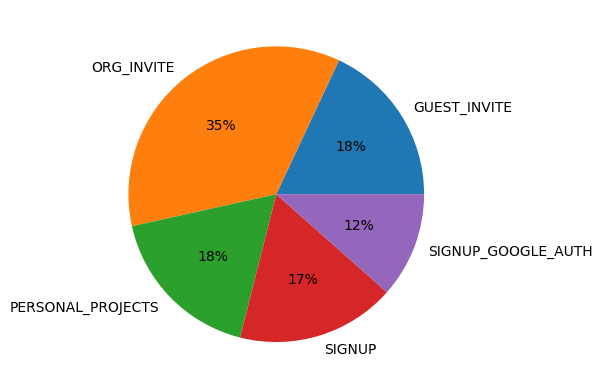

In [32]:
counting_creation_source= df2.groupby(['creation_source']).size()
counting_creation_source = counting_creation_source.to_frame(name = 'size').reset_index()
y = np.array(counting_creation_source['size'])
label = np.array(counting_creation_source['creation_source'])
plt.pie(y, labels =label, autopct='%1.0f%%')
plt.show()

**We can observe that OR_Invite has the highest creation source**

<BarContainer object of 12000 artists>

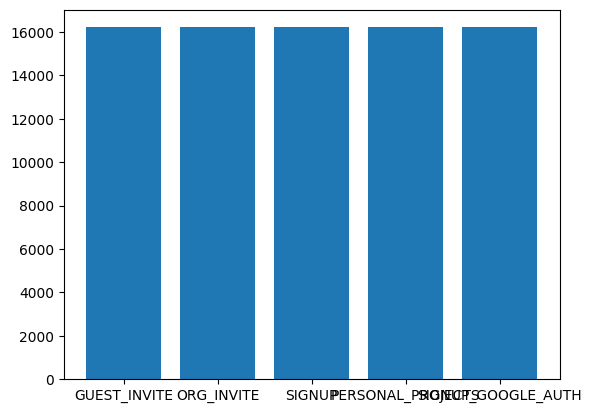

In [33]:
plt.bar(df2['creation_source'],df2['active_days'])

In [35]:
!pip install nbformat --upgrade


                                              0.0/77.6 kB ? eta -:--:--
     ------------------------------------     71.7/77.6 kB 1.9 MB/s eta 0:00:01
     ------------------------------------     71.7/77.6 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 77.6/77.6 kB 612.1 kB/s eta 0:00:00
                                              0.0/90.4 kB ? eta -:--:--
     ------------------------------------     81.9/90.4 kB 4.5 MB/s eta 0:00:01
     ------------------------------------     81.9/90.4 kB 4.5 MB/s eta 0:00:01
     ------------------------------------     81.9/90.4 kB 4.5 MB/s eta 0:00:01
     -------------------------------------- 90.4/90.4 kB 428.6 kB/s eta 0:00:00
                                              0.0/61.2 kB ? eta -:--:--
     ---------------------------------        51.2/61.2 kB ? eta -:--:--
     ---------------------------------        51.2/61.2 kB ? eta -:--:--
     -------------------------------------- 61.2/61.2 kB 467.2 kB/s eta 0:00:0

In [41]:
!conda install nbformat==4.2.0


'conda' is not recognized as an internal or external command,
operable program or batch file.


In [42]:
px.bar(df2, x ='email_domain',y = 'active_days',color='creation_source',barmode = 'group')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': ('creation_source=GUEST_INVITE<b' ... 'ctive_days=%{y}<extra></extra>'),
              'legendgroup': 'GUEST_INVITE',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'GUEST_INVITE',
              'offsetgroup': 'GUEST_INVITE',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['yahoo.com', 'yahoo.com', 'yahoo.com', ..., 'gmail.com', 'eaouk.com',
                          'cuvox.de'], dtype=object),
              'xaxis': 'x',
              'y': array([16182, 15846, 15722, ..., 15769, 15496, 16187], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('creation_source=ORG_INVITE<br>' ... 'ctive_days=%{y}<extra></extra>'),
              'legendgroup': 'ORG_INVITE',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'ORG_INVITE',
              'offsetgroup': 'ORG_INVITE',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['gustr.com', 'gustr.com', 'gustr.com', ..., 'gmail.com',
                          'jourrapide.com', 'gustr.com'], dtype=object),
              'xaxis': 'x',
              'y': array([16024, 15783, 15721, ..., 16045, 15891, 15954], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'creation_source=SIGNUP<br>email_domain=%{x}<br>active_days=%{y}<extra></extra>',
              'legendgroup': 'SIGNUP',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'SIGNUP',
              'offsetgroup': 'SIGNUP',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['jourrapide.com', 'gustr.com', 'gmail.com', ..., 'yahoo.com',
                          'uyhoy.com', 'hotmail.com'], dtype=object),
              'xaxis': 'x',
              'y': array([15690, 16065, 15624, ..., 16112, 15779, 16096], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('creation_source=PERSONAL_PROJE' ... 'ctive_days=%{y}<extra></extra>'),
              'legendgroup': 'PERSONAL_PROJECTS',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': 'PERSONAL_PROJECTS',
              'offsetgroup': 'PERSONAL_PROJECTS',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['yahoo.com', 'hotmail.com', 'hotmail.com', ..., 'cuvox.de', 'gmail.com',
                          'iuxiw.com'], dtype=object),
              'xaxis': 'x',
              'y': array([15917, 16014, 15902, ..., 15792, 15999, 15491], dtype=int64),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('creation_source=SIGNUP_GOOGLE_' ... 'ctive_days=%{y}<extra></extra>'),
              'legendgroup': 'SIGNUP_GOOGLE_AUTH',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': 'SIGNUP_GOOGLE_AUTH',
              'offsetgroup': 'SIGNUP_GOOGLE_AUTH',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['gmail.com', 'gmail.com', 'gmail.com', ..., 'gmail.com', 'gmail.com',
                          'gmail.com'], dtype=object),
              'xaxis': 'x',
              'y': array([16189, 15539, 16136, ..., 15950, 16180, 15715], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'cre

In [43]:
### We merge them both together as the visualization did not yield any analysis

In [44]:
df_merged = pd.merge(df2, df123, left_on='object_id' , right_on='user_id')
df_merged

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,email_domain,user_id,visited,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,16182,yahoo.com,1,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,16024,gustr.com,2,3,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,15783,gustr.com,3,2,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,15846,yahoo.com,4,3,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,15722,yahoo.com,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8818,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0,15954,gustr.com,11996,4,1
8819,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,0.0,15715,gmail.com,11997,5,1
8820,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0,16187,cuvox.de,11998,6,1
8821,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,0.0,15491,iuxiw.com,11999,7,1


In [45]:
df_merged.describe()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,user_id,visited,adopted_user
count,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000,8823.000000
mean,6019.821716,0.252295,0.151989,142.572254,3237.316786,15904.155503,6019.821716,5.157316,0.908421
std,3464.251001,0.434354,0.359031,124.176422,3888.088044,215.986725,3464.251001,1.737854,0.288447
min,1.000000,0.000000,0.000000,0.000000,0.000000,15491.000000,1.000000,1.000000,0.000000
25%,3017.500000,0.000000,0.000000,30.000000,0.000000,15723.000000,3017.500000,4.000000,1.000000
50%,6034.000000,0.000000,0.000000,109.000000,1055.000000,15926.000000,6034.000000,5.000000,1.000000
75%,9029.500000,1.000000,0.000000,239.000000,6405.000000,16099.500000,9029.500000,7.000000,1.000000
max,12000.000000,1.000000,1.000000,416.000000,11999.000000,16220.000000,12000.000000,7.000000,1.000000


In [46]:
df_merged.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
active_days                            int64
email_domain                          object
user_id                                int64
visited                                int32
adopted_user                           int32
dtype: object

In [122]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          8823 non-null   float64       
 10  active_days                 8823 non-null   int64         
 11  email_domain                8823 non-null   object      

In [47]:
df_merged.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
active_days                   0
email_domain                  0
user_id                       0
visited                       0
adopted_user                  0
dtype: int64

In [50]:
df_merged.columns


Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'active_days', 'email_domain', 'user_id', 'visited', 'adopted_user'],
      dtype='object')

In [51]:
df_merged.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,email_domain,user_id,visited,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,16182,yahoo.com,1,1,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,16024,gustr.com,2,3,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,15783,gustr.com,3,2,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,15846,yahoo.com,4,3,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,15722,yahoo.com,5,4,1


### We can split it into week, days, month, year

In [52]:
df_merged['date'] = df_merged['creation_time'].astype('datetime64') ## splitting the date
df_merged['week'] = df_merged['date'].dt.isocalendar().week ## splitting the weeks
df_merged['year'] = df_merged['date'].dt.isocalendar().year ## splitting the year
df_merged['month'] = df_merged['date'].dt.month ## splitting the month
df_merged

C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_20100\121891064.py:1: FutureWarning:

Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead



,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,email_domain,user_id,visited,adopted_user,date,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,16182,yahoo.com,1,1,0,2014-04-22 03:53:30,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,16024,gustr.com,2,3,1,2013-11-15 03:45:04,46,2013,11
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,15783,gustr.com,3,2,0,2013-03-19 23:14:52,12,2013,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,15846,yahoo.com,4,3,1,2013-05-21 08:09:28,21,2013,5
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,15722,yahoo.com,5,4,1,2013-01-17 10:14:20,3,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8818,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0,0,89,8263.0,15954,gustr.com,11996,4,1,2013-09-06 06:14:15,36,2013,9
8819,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0,0,200,0.0,15715,gmail.com,11997,5,1,2013-01-10 18:28:37,2,2013,1
8820,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1,1,83,8074.0,16187,cuvox.de,11998,6,1,2014-04-27 12:45:16,17,2014,4
8821,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0,0,6,0.0,15491,iuxiw.com,11999,7,1,2012-05-31 11:55:59,22,2012,5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'GUEST_INVITE'),
  Text(1, 0, 'ORG_INVITE'),
  Text(2, 0, 'SIGNUP'),
  Text(3, 0, 'PERSONAL_PROJECTS'),
  Text(4, 0, 'SIGNUP_GOOGLE_AUTH')])

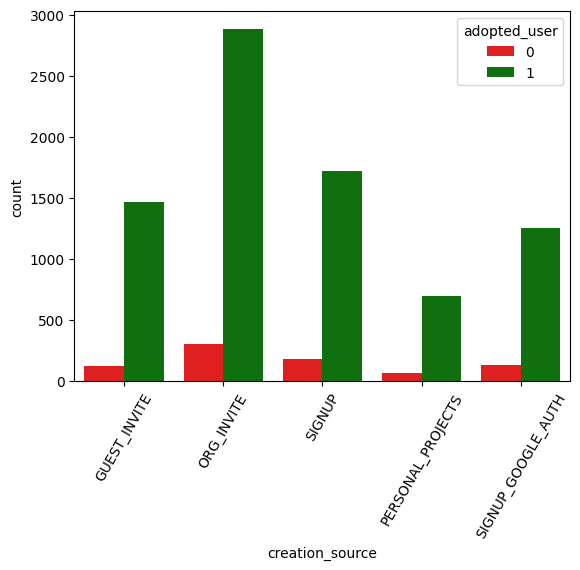

In [53]:
sns.countplot(x="creation_source", data=df_merged,hue='adopted_user',palette=['red','green'])
plt.xticks(rotation=60)

In [54]:
df_merged.corr()

C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_20100\2993353554.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_days,user_id,visited,adopted_user,week,year,month
object_id,1.000000,-0.034920,-0.028916,0.002285,0.003493,0.021655,1.000000,-0.016796,-0.005888,0.008905,0.014088,0.009135
opted_in_to_mailing_list,-0.034920,1.000000,0.488219,-0.002421,0.010839,0.003144,-0.034920,0.002675,-0.000132,-0.010274,0.006692,-0.009109
enabled_for_marketing_drip,-0.028916,0.488219,1.000000,0.000538,-0.000173,0.003440,-0.028916,-0.005806,-0.002400,-0.009951,0.006784,-0.005481
org_id,0.002285,-0.002421,0.000538,1.000000,-0.042723,0.001083,0.002285,0.020094,-0.004591,-0.002386,0.001987,-0.004828
invited_by_user_id,0.003493,0.010839,-0.000173,-0.042723,1.000000,0.000313,0.003493,-0.003695,0.004756,-0.016379,0.006843,-0.014805
active_days,0.021655,0.003144,0.003440,0.001083,0.000313,1.000000,0.021655,-0.042545,-0.005639,-0.262936,0.923964,-0.269082
user_id,1.000000,-0.034920,-0.028916,0.002285,0.003493,0.021655,1.000000,-0.016796,-0.005888,0.008905,0.014088,0.009135
visited,-0.016796,0.002675,-0.005806,0.020094,-0.003695,-0.042545,-0.016796,1.000000,0.577103,0.013263,-0.040085,0.013375
adopted_user,-0.005888,-0.000132,-0.002400,-0.004591,0.004756,-0.005639,-0.005888,0.577103,1.000000,0.002853,-0.005695,0.000547
week,0.008905,-0.010274,-0.009951,-0.002386,-0.016379,-0.262936,0.008905,0.013263,0.002853,1.000000,-0.611894,0.975714


C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_20100\2508604028.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



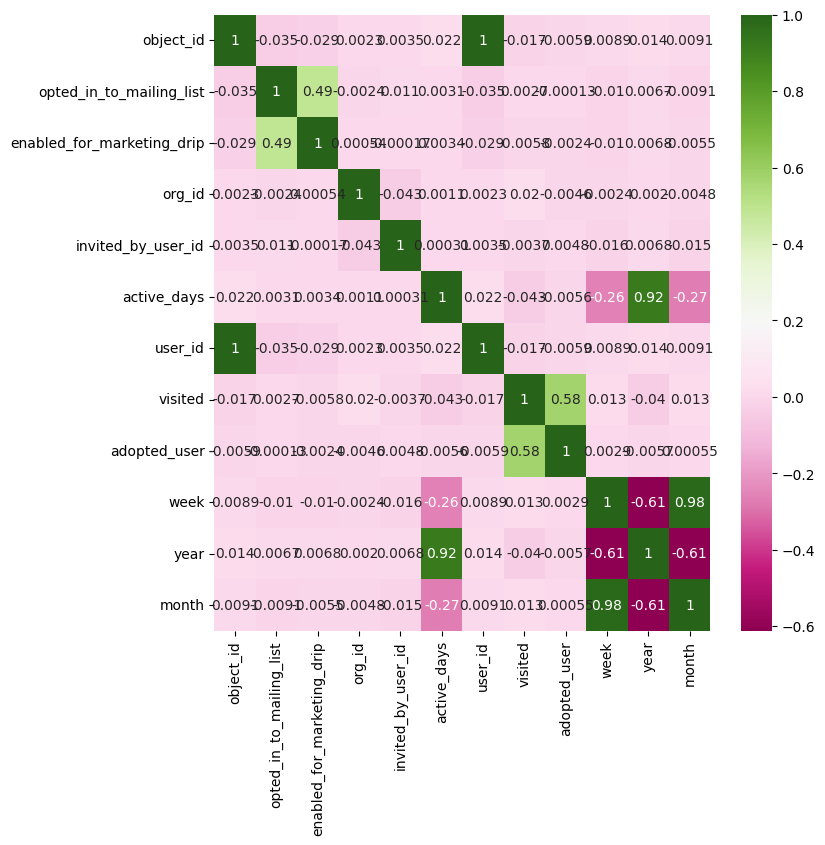

In [55]:
## Generating the Heat Map so that we can get more about the variables

correlation_of_variables = df_merged.corr()
top_features = correlation_of_variables.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_merged[top_features].corr(),annot=True,cmap="PiYG")

C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_20100\2555793823.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



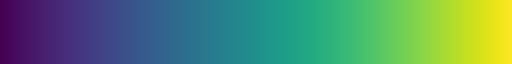

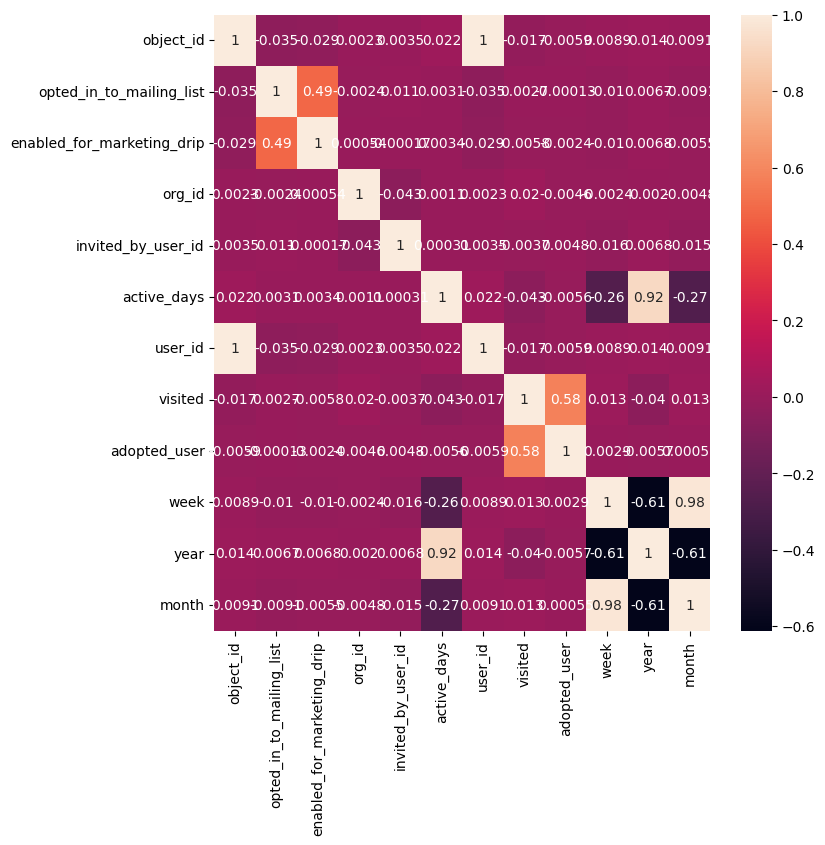

In [56]:
## Generating the Heat Map so that we can get more about the variables

correlation_of_variables = df_merged.corr()
top_features = correlation_of_variables.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_merged[top_features].corr(),annot=True)
sns.color_palette("viridis", as_cmap=True)

C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_20100\3229318491.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



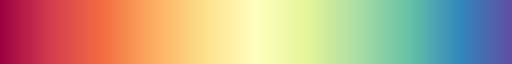

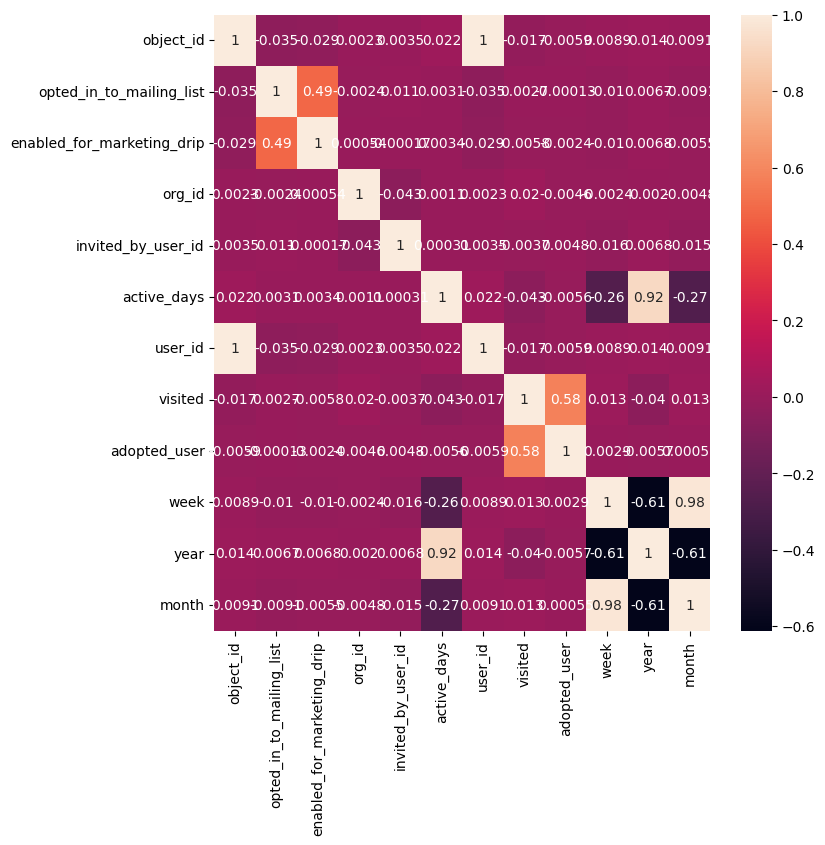

In [57]:
## Generating the Heat Map 

correlation_of_variables = df_merged.corr()
top_features = correlation_of_variables.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_merged[top_features].corr(),annot=True)
sns.color_palette("Spectral", as_cmap=True)

C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_20100\349682861.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



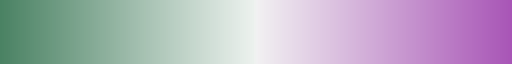

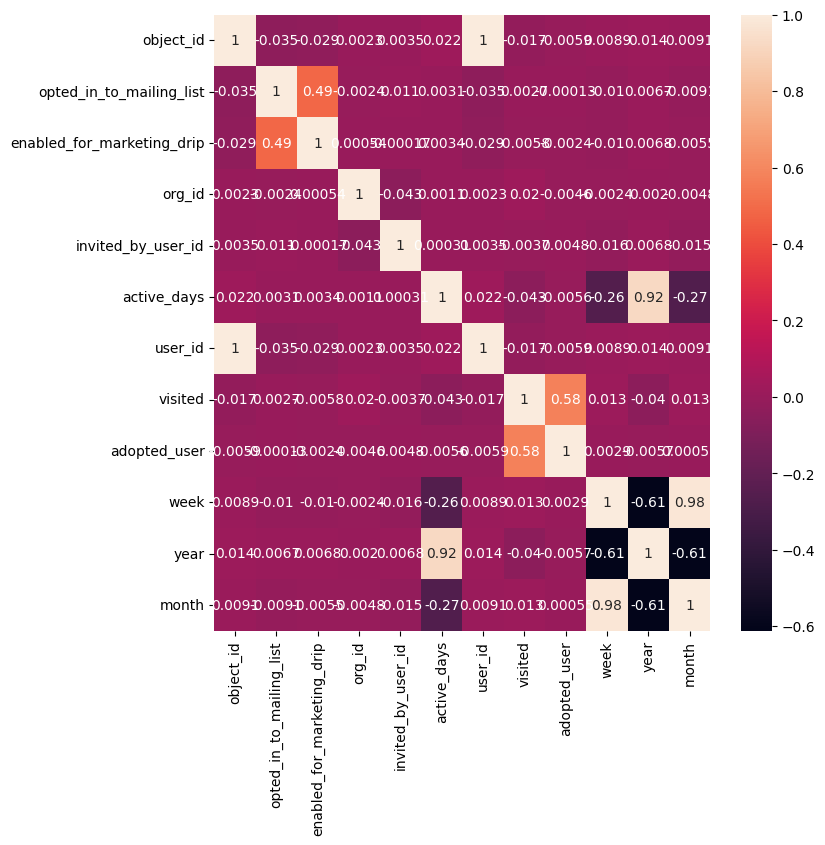

In [58]:
## Generating the Heat Map 
correlation_of_variables = df_merged.corr()
top_features = correlation_of_variables.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df_merged[top_features].corr(),annot=True)
sns.diverging_palette(145, 300, s=60, as_cmap=True)

#### Additional Research on the first dataset i.e takehome_user_engagement.csv

In [59]:

df1.time_stamp=pd.to_datetime(df1.time_stamp) 
## grouping the user_id based on visted 
df12=df1.set_index('time_stamp').groupby('user_id')['visited'].resample('D').count()
df12=pd.DataFrame(df12)
df12 = df12.rolling(window=7, min_periods=1).sum()
df12.reset_index(inplace=True)
df12

,user_id,time_stamp,visited
0,1,2014-04-22,1.0
1,2,2013-11-15,2.0
2,2,2013-11-16,2.0
3,2,2013-11-17,2.0
4,2,2013-11-18,2.0
...,...,...,...
522496,11996,2013-09-06,4.0
522497,11997,2013-01-15,5.0
522498,11998,2014-04-27,6.0
522499,11999,2012-06-02,7.0


In [60]:
df12['date'] = df12['time_stamp'].astype('datetime64')
df12['week'] = df12['date'].dt.isocalendar().week
df12['year'] = df12['date'].dt.isocalendar().year
df12['month'] = df12['date'].dt.month
df12.head()

C:\Users\Priyanka C\AppData\Local\Temp\ipykernel_20100\2465208229.py:1: FutureWarning:

Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead



,user_id,time_stamp,visited,date,week,year,month
0,1,2014-04-22,1.0,2014-04-22,17,2014,4
1,2,2013-11-15,2.0,2013-11-15,46,2013,11
2,2,2013-11-16,2.0,2013-11-16,46,2013,11
3,2,2013-11-17,2.0,2013-11-17,46,2013,11
4,2,2013-11-18,2.0,2013-11-18,47,2013,11


In [61]:
# grouping the user_ids, visited,date,week,year,month in order to eliminate the time_stamp
df12 = df12.groupby(['user_id','week','month','year'])['visited'].count().reset_index()
df12

,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,1,2014,5
2,2,1,12,2014,2
3,2,2,1,2014,7
4,2,3,1,2014,7
...,...,...,...,...,...
97663,11996,36,9,2013,1
97664,11997,3,1,2013,1
97665,11998,17,4,2014,1
97666,11999,22,6,2012,1


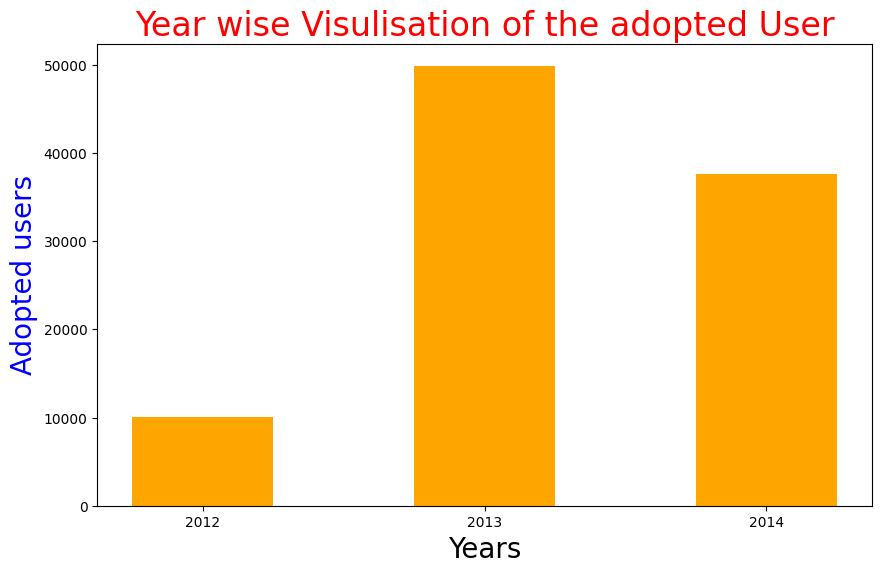

In [64]:
x = ['2012','2013','2014']
q= df12.year.value_counts()
y = [q[2012],q[2013],q[2014]]
plt.figure(figsize=(10,6))
plt.bar(x,y,color='orange',width=0.5)
plt.xlabel("Years",color='black',fontsize=20)
plt.ylabel("Adopted users",color='blue',fontsize=20)
plt.title("Year wise Visulisation of the adopted User",color='red',fontsize=24)
plt.show()

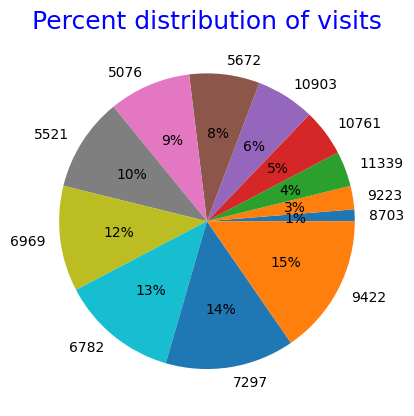

In [63]:
x = df12.groupby(['month']).size().values
y = df12.groupby(['month']).size().index
x = np.array(x)
y = np.array(y)
plt.pie(y, labels = x, autopct='%1.0f%%')
plt.title("Percent distribution of visits", color = 'Blue',fontsize=18)
plt.show()
